In [1]:
import sys
!{sys.executable} -m pip install tensorflow-cpu

import tensorflow as tf
from tensorflow.keras import models, layers, backend, initializers
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import os
import glob
from random import randrange
import pandas as pd

C:\Users\kayja\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
n_fft = 2048
hop_length = 512
n_mels = 256
sr = 22050
padding = ((0, 0), (62, 62))
EPOCHS = 20
learning_rate = 1e-5
he_uniform = initializers.HeUniform(seed = 42)

In [3]:
def WASSERSTEIN_LOSS(y_true, y_pred):
    
    return backend.mean(y_true * y_pred)

In [4]:
def GENERATOR():
    
    input_shape = (256, 336, 1)
    noise_shape = (32, 334, 64)
    
    # Define the input layers
    input_layer = layers.Input(shape = input_shape)
    noise_input = layers.Input(shape = noise_shape)
    
    # Conv1
    generator = layers.Conv2D(filters = 18, kernel_size = (3, 3), strides = (1, 1), padding = "same", data_format = "channels_last", dilation_rate = 1, kernel_initializer = he_uniform)(input_layer)
    generator = layers.PReLU()(generator)
    
    # Conv2
    generator = layers.Conv2D(filters = 38, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 2, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    
    # Conv3
    generator = layers.Conv2D(filters = 38, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 4, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    
    # Conv4
    generator = layers.Conv2D(filters = 4096, kernel_size = (256, 1), strides = (1, 1), padding = "valid", dilation_rate = 1, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)

    # Reshape1
    generator = layers.Reshape((32, 336, 128))(generator)
    assert generator.shape[1:] == (32, 336, 128)
    
    # Remap1
    generator = layers.Conv2D(filters = 256, kernel_size = (1, 1), strides = (1, 1), padding = "valid", dilation_rate = 1, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    
    # Conv5
    generator = layers.ZeroPadding2D(padding = ((1, 1), (0, 0)))(generator)
    generator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), dilation_rate = 1, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    
    # Noise Concatenate
    generator = layers.Concatenate(axis = -1)([generator, noise_input])
    
    #Conv6
    generator = layers.ZeroPadding2D(padding = ((2, 2), (0, 0)))(generator)
    generator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), dilation_rate = 2, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    # self gating?
              
    # Conv7
    generator = layers.ZeroPadding2D(padding = ((4, 4), (0, 0)))(generator)
    generator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), dilation_rate = 4, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    # self gating?
              
    # Conv8
    generator = layers.ZeroPadding2D(padding = ((8, 8), (0, 0)))(generator)
    generator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), dilation_rate = 8, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    # self gating?
              
    # Conv9
    generator = layers.ZeroPadding2D(padding = ((16, 16), (0, 0)))(generator)
    generator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), dilation_rate = 16, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    # self gating?
            
    # Conv10
    generator = layers.ZeroPadding2D(padding = ((1, 1), (0, 0)))(generator)
    generator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), dilation_rate = 1, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    # self gating?
    
    # Conv11
    generator = layers.ZeroPadding2D(padding = ((2, 2), (0, 0)))(generator)
    generator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), dilation_rate = 2, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    # self gating?
        
    # Conv12
    generator = layers.ZeroPadding2D(padding = ((4, 4), (0, 0)))(generator)
    generator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), dilation_rate = 4, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    # self gating?
        
    # Conv13
    generator = layers.ZeroPadding2D(padding = ((8, 8), (0, 0)))(generator)
    generator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), dilation_rate = 8, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    # self gating?
          
    # Conv14
    generator = layers.ZeroPadding2D(padding = ((16, 16), (0, 0)))(generator)
    generator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), dilation_rate = 16, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    # self gating?
              
    # Reshape2
    generator = layers.Reshape((1, 212, 8192))(generator)
    #assert Reshape2.shape[1:] == (1, 212, 4096)
              
    # Deconv4
    generator = layers.Conv2DTranspose(filters = 38, kernel_size = (256, 1), strides = (1, 1), padding = "valid", data_format = "channels_last", dilation_rate = 1, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    #assert Deconv4.shape[1:] == (1024, 212, 38)
              
    # Deconv3
    generator = layers.Conv2DTranspose(filters = 38, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 4, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    #assert Deconv3.shape[1:] == (1024, 212, 38)
              
    # Deconv2
    generator = layers.Conv2DTranspose(filters = 18, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 2, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    #assert Deconv2.shape[1:] == (1024, 212, 18)
              
    # Deconv1
    generator = layers.Conv2DTranspose(filters = 1, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 1, kernel_initializer = he_uniform)(generator)
    generator = layers.PReLU()(generator)
    #assert Deconv1.shape[1:] == (1024, 212, 2)
    
    generator_model = models.Model(inputs = [input_layer, noise_input], outputs = generator)
    
    return generator_model

In [5]:
def DISCRIMINATOR():

    input_shape = (256, 212, 1)
    
    input_layer = layers.Input(shape = input_shape)
    
    # Conv1
    discriminator = layers.Conv2D(filters = 18, kernel_size = (3, 3), strides = (1, 1), padding = "same", data_format = "channels_last", dilation_rate = 1, kernel_initializer = he_uniform)(input_layer)
    discriminator = layers.PReLU()(discriminator)
    
    # Conv2
    discriminator = layers.Conv2D(filters = 38, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 2, kernel_initializer = he_uniform)(discriminator)
    discriminator = layers.PReLU()(discriminator)
           
    # Conv3    
    discriminator = layers.Conv2D(filters = 38, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 4, kernel_initializer = he_uniform)(discriminator)
    discriminator = layers.PReLU()(discriminator)
           
    # Conv4    
    discriminator = layers.Conv2D(filters = 4096, kernel_size = (256, 1), strides = (1, 1), padding = "valid", dilation_rate = 1, kernel_initializer = he_uniform)(discriminator)
    discriminator = layers.PReLU()(discriminator)

    # Reshape1
    discriminator = layers.Reshape((32, 212, 128))(discriminator)
    assert discriminator.shape[1:] == (32, 212, 128)
    
    # Remap1
    discriminator = layers.Conv2D(filters = 256, kernel_size = (1, 1), strides = (1, 1), padding = "valid", dilation_rate = 1, kernel_initializer = he_uniform)(discriminator)
    discriminator = layers.PReLU()(discriminator)
              
    # Conv5
    discriminator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 1, kernel_initializer = he_uniform)(discriminator)
    discriminator = layers.PReLU()(discriminator)
    
    #Conv6
    discriminator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 2, kernel_initializer = he_uniform)(discriminator)
    discriminator = layers.PReLU()(discriminator)
    # self gating?
              
    # Conv7
    discriminator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 4, kernel_initializer = he_uniform)(discriminator)
    discriminator = layers.PReLU()(discriminator)
    # self gating?
              
    # Conv8
    discriminator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 8, kernel_initializer = he_uniform)(discriminator)
    discriminator = layers.PReLU()(discriminator)
    # self gating?
              
    # Conv9
    discriminator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 16, kernel_initializer = he_uniform)(discriminator)
    discriminator = layers.PReLU()(discriminator)
    # self gating?
            
    # Conv10
    discriminator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 1, kernel_initializer = he_uniform)(discriminator)
    discriminator = layers.PReLU()(discriminator)
    # self gating?
    
    # Conv11
    discriminator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 2, kernel_initializer = he_uniform)(discriminator)
    discriminator = layers.PReLU()(discriminator)
    # self gating?
        
    # Conv12
    discriminator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 4, kernel_initializer = he_uniform)(discriminator)
    discriminator = layers.PReLU()(discriminator)
    # self gating?
        
    # Conv13
    discriminator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 8, kernel_initializer = he_uniform)(discriminator)
    discriminator = layers.PReLU()(discriminator)
    # self gating?
          
    # Conv14
    discriminator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 16, kernel_initializer = he_uniform)(discriminator)
    discriminator = layers.PReLU()(discriminator)
    # self gating?
    
    # Conv15
    discriminator = layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = "same", dilation_rate = 1, kernel_initializer = he_uniform)(discriminator)
    discriminator = layers.PReLU()(discriminator)
    
    # Conv16
    discriminator = layers.Conv2D(filters = 1, kernel_size = (32, 1), strides = (1, 1), padding = "valid", dilation_rate = 1, kernel_initializer = he_uniform)(discriminator)
    
    discriminator_model = models.Model(inputs = input_layer, outputs = discriminator)
       
    return discriminator_model

In [6]:
song0 = r"C:\Users\kayja\OneDrive\Desktop\songs\song0"
song16 = r"C:\Users\kayja\OneDrive\Desktop\songs\song16"

original_songs = glob.glob(os.path.join(song0, '*.mp3'))
compressed_songs = glob.glob(os.path.join(song16, '*.mp3'))

original_songs_paths = [str(mp3) for mp3 in original_songs]
compressed_songs_paths = [str(mp3) for mp3 in compressed_songs]

SONGS0 = np.zeros((256, 212, len(original_songs_paths)))
SONGS16 = np.zeros((256, 336, len(compressed_songs_paths)))

for mp3 in range(len(original_songs_paths)):
    
    song0 = original_songs_paths[mp3]
    song16 = compressed_songs_paths[mp3]
    
    s0, _ = librosa.load(song0)
    s16, _ = librosa.load(song16)
    
    s0, _ = librosa.effects.trim(s0)
    s16, _ = librosa.effects.trim(s16)
    
    S0 = librosa.feature.melspectrogram(y = s0, sr = sr, n_fft = n_fft, hop_length = hop_length, n_mels = n_mels)
    
    S16 = librosa.feature.melspectrogram(y = s16, sr = sr, n_fft = n_fft, hop_length = hop_length, n_mels = n_mels)
    
    if (S0.shape[1] > 212):
        S0 = S0[:, :212]
        
    if (S16.shape[1] > 212):
        S16 = S16[:, :212]
        
    S16 = np.pad(S16, padding, mode = "constant", constant_values = 0)
    
    SONGS0[:, :, mp3] = S0
    SONGS16[:, :, mp3] = S16

C:\Users\kayja\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
C:\Users\kayja\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [7]:
gen = GENERATOR()
disc = DISCRIMINATOR()
optimiser = tf.keras.optimizers.legacy.Adam(learning_rate = learning_rate)

for epoch in range(EPOCHS):
    print("Epoch : ", epoch)
    
    #for _ in range(len(original_songs_paths)):
    for _ in range(4):
        
        #song = randrange(0, len(original_songs_paths))
        song = randrange(0, 4)
        
        norm_value_original = (np.amax(SONGS0[:, :, song]) + np.amin(SONGS0[:, :, song]))/2
        norm_value_compressed = (np.amax(SONGS16[:, :, song]) + np.amin(SONGS16[:, :, song]))/2
        norm_original = (SONGS0[:, :, song] - norm_value_original)/norm_value_original
        norm_compressed = (SONGS16[:, :, song] - norm_value_original)/norm_value_original
        mel_original = np.reshape(norm_original, (1, 256, 212, 1))
        mel_compressed = np.reshape(norm_compressed, (1, 256, 336, 1))
        noise_vector = tf.random.uniform(shape = [1, 32, 334, 64])
        
        with tf.GradientTape() as disc_tape:
            generated_spectrogram = gen([mel_compressed, noise_vector])
        
            real_decision = disc(mel_original)
            fake_decision = disc(generated_spectrogram)
            
            real_loss = WASSERSTEIN_LOSS(tf.ones_like(real_decision), real_decision)
            fake_loss = WASSERSTEIN_LOSS(tf.zeros_like(fake_decision), fake_decision)
            disc_loss = 0.5 * (real_loss + fake_loss)
           
        print("D_loss : ", disc_loss)
        discriminator_gradients = disc_tape.gradient(disc_loss, disc.trainable_variables)
        optimiser.apply_gradients(zip(discriminator_gradients, disc.trainable_variables))
        
        with tf.GradientTape() as gen_tape:
            generated_spectrogram = gen([mel_compressed, noise_vector])

            fake_output = disc(generated_spectrogram)
            gen_loss = WASSERSTEIN_LOSS(tf.ones_like(fake_output), fake_output)

        print("G_loss : ", gen_loss)
        generator_gradients = gen_tape.gradient(gen_loss, gen.trainable_variables)
        optimiser.apply_gradients(zip(generator_gradients, gen.trainable_variables))

Epoch :  0
D_loss :  tf.Tensor(0.2073442, shape=(), dtype=float32)
G_loss :  tf.Tensor(0.045843564, shape=(), dtype=float32)
D_loss :  tf.Tensor(-0.021024445, shape=(), dtype=float32)
G_loss :  tf.Tensor(-0.1418941, shape=(), dtype=float32)
D_loss :  tf.Tensor(-0.190507, shape=(), dtype=float32)
G_loss :  tf.Tensor(-0.32100505, shape=(), dtype=float32)
D_loss :  tf.Tensor(-0.33979273, shape=(), dtype=float32)
G_loss :  tf.Tensor(-0.55179757, shape=(), dtype=float32)
Epoch :  1
D_loss :  tf.Tensor(-0.4972366, shape=(), dtype=float32)
G_loss :  tf.Tensor(-0.8959791, shape=(), dtype=float32)
D_loss :  tf.Tensor(-0.6606789, shape=(), dtype=float32)
G_loss :  tf.Tensor(-1.4028953, shape=(), dtype=float32)
D_loss :  tf.Tensor(-0.8327532, shape=(), dtype=float32)
G_loss :  tf.Tensor(-2.1636362, shape=(), dtype=float32)
D_loss :  tf.Tensor(-1.0417037, shape=(), dtype=float32)
G_loss :  tf.Tensor(-3.3236039, shape=(), dtype=float32)
Epoch :  2
D_loss :  tf.Tensor(-1.2778273, shape=(), dtype=flo

In [8]:
generator_output = np.reshape(generated_spectrogram._numpy(), (256, 212))
norm_value_generated = (np.amax(generator_output) + np.amin(generator_output))/2
output_audio = (generator_output * norm_value_generated) + norm_value_generated
S_OP = librosa.power_to_db(output_audio, ref = np.max)

'\nS_OP = librosa.power_to_db(generator_output, ref = np.max)\n'

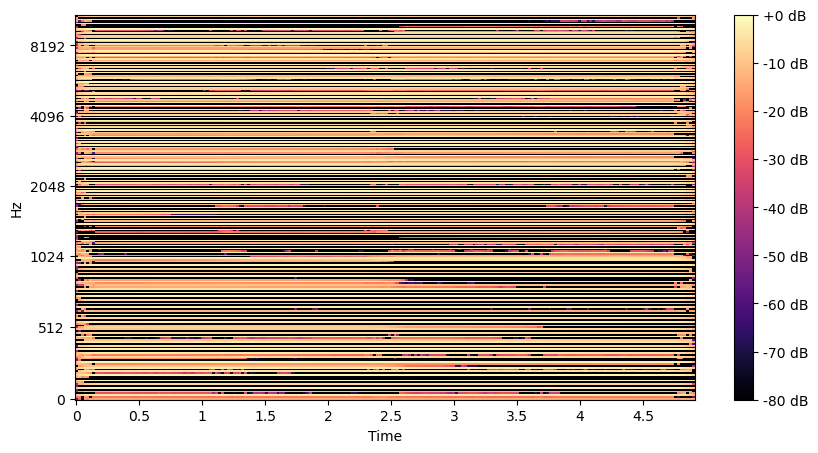

In [9]:
plt.figure(figsize = (10, 5))
librosa.display.specshow(S_OP, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'mel')
plt.colorbar(format = '%+2.0f dB');
plt.show()

In [10]:
reconstructed_audio = librosa.feature.inverse.mel_to_audio(output_audio, sr = sr)
ipd.Audio(data = reconstructed_audio, rate = sr)

In [11]:
disc.trainable_variables

[<tf.Variable 'conv2d_15/kernel:0' shape=(3, 3, 1, 18) dtype=float32, numpy=
 array([[[[-3.56714576e-01, -1.12480519e-03,  3.50448757e-01,
           -7.84952998e-01, -6.89586878e-01,  2.08053350e-01,
            4.17688906e-01, -5.33920765e-01, -6.07723176e-01,
           -7.29331851e-01,  7.21207201e-01, -4.41606373e-01,
           -3.52277197e-02, -4.15309012e-01,  3.68148535e-01,
            4.40819919e-01,  5.88312782e-02, -5.42429209e-01]],
 
         [[ 3.15678003e-03, -4.88531470e-01, -7.60242522e-01,
           -3.07174116e-01, -4.32542190e-02,  9.87865031e-02,
            5.29552042e-01,  1.48875847e-01, -2.94912428e-01,
            4.29738075e-01, -6.12583280e-01,  1.58644065e-01,
           -3.20613950e-01,  5.74780405e-01,  7.34017611e-01,
            4.26819980e-01, -3.03795934e-01,  2.75157958e-01]],
 
         [[ 6.61339685e-02,  8.05517375e-01,  2.33139381e-01,
           -7.90652573e-01,  1.44179761e-01,  3.14795673e-01,
            5.87393165e-01,  5.41386962e-01,  6